In [1]:
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer


import string
from collections import Counter


In [2]:
responses = pd.read_csv(r'./Data/formresponses.csv')

In [3]:
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
print(sw_nltk)
nltk.download('wordnet')
nltk.download('omw-1.4')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/shrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shrey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/shrey/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
lemmatizer = WordNetLemmatizer()

In [5]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

QUESTION 1

In [6]:
alltextq1 = responses['What are things that make you glad to live in Grinnell?  '].dropna()
listtextq1 = alltextq1.tolist()

#to prevent College and college being different
strtextq1 = " ".join(listtextq1).lower()
# listtextoneword = finaltextq1.split(' ')
listtextonewordq1 = re.split(r',| ', strtextq1)
#to get rid of stop words
listtext_withoutstopwordsq1 = [i for i in listtextonewordq1 if i not in sw_nltk]
lemmatized_textq1 = [lemmatizer.lemmatize(word) for word in listtext_withoutstopwordsq1]

finaltextq1 = " ".join(lemmatized_textq1)

# #visualize
# wordcloud = WordCloud().generate(finaltextq1)
# plt.title("Q1: What are things that make you glad to live in Grinnell?")
# plt.imshow(wordcloud, interpolation='bilinear')
# print(listtext_withoutstopwordsq1)



In [7]:
wcq1 = word_count(finaltextq1)
wcsortedq1 = sorted(wcq1.items(), key=lambda x:x[1], reverse=True)
dict_wcsortedq1 = dict(wcsortedq1)
print(dict_wcsortedq1)

{'community': 141, 'town': 95, 'small': 89, 'grinnell': 79, 'college': 75, 'people': 69, 'good': 53, 'park': 52, 'great': 39, 'size': 39, 'family': 38, 'like': 35, 'downtown': 35, 'lot': 31, 'live': 31, 'nice': 31, 'love': 30, 'school': 30, 'friendly': 28, 'safe': 28, 'easy': 28, 'get': 28, 'feel': 26, 'low': 25, 'art': 24, 'living': 23, 'city': 22, 'library': 22, 'restaurant': 21, 'event': 21, 'opportunity': 21, 'local': 20, 'many': 19, 'diversity': 19, 'business': 19, 'work': 18, 'close': 18, 'crime': 18, 'access': 17, 'beautiful': 17, 'place': 17, '-': 16, 'store': 16, 'friend': 16, 'music': 15, 'town.': 15, 'activity': 14, 'know': 14, 'traffic': 14, 'shop': 13, 'also': 13, 'market': 13, 'community.': 13, 'people.': 13, 'public': 13, 'around': 13, 'grinnell.': 13, '&': 12, 'thing': 12, 'farmer': 11, 'make': 11, 'safety': 11, 'well': 11, 'sense': 11, 'walkable': 11, 'care': 11, 'rate': 11, 'the': 10, 'high': 10, 'area': 10, 'bike': 10, 'hospital': 10, 'service': 10, 'center': 10, 'op

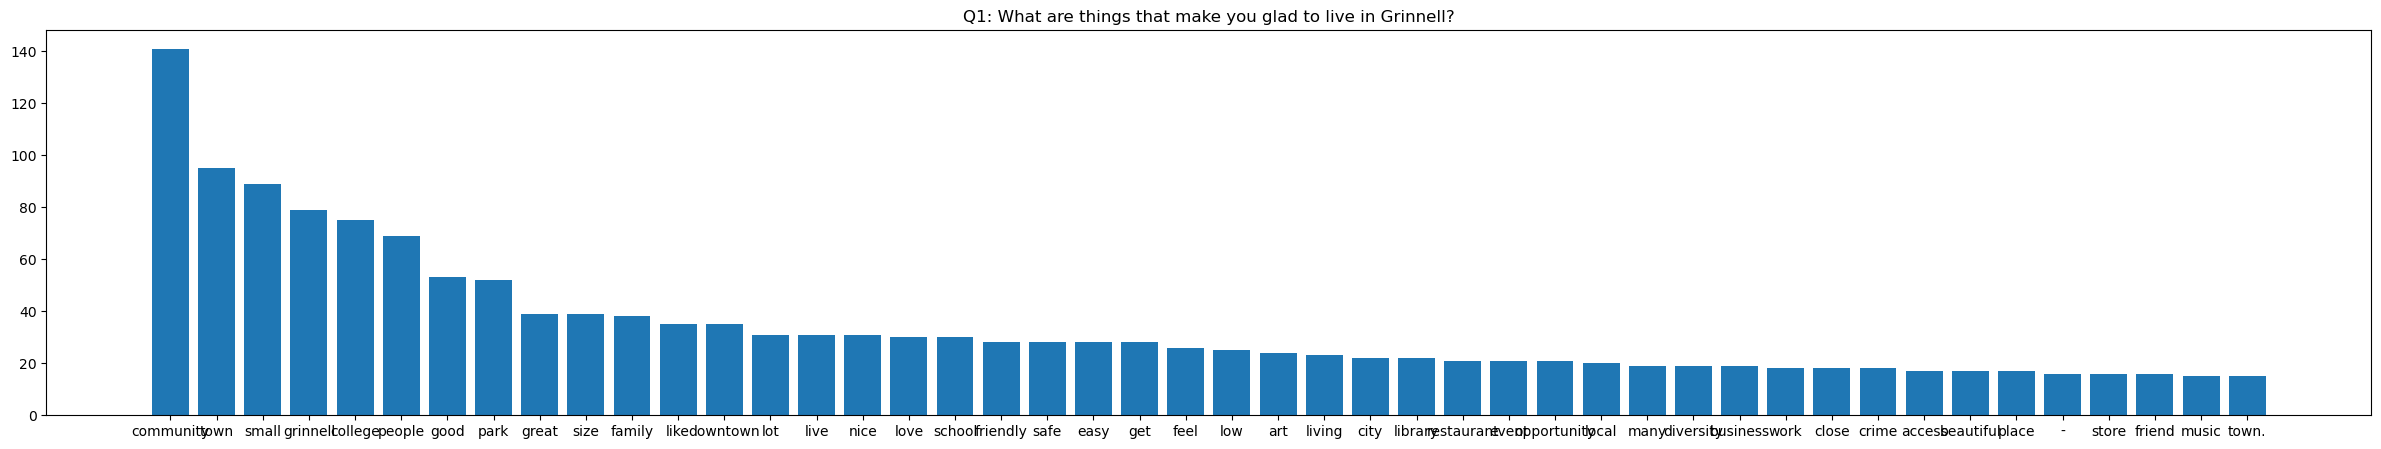

In [8]:
resultq1 = {key:value for (key, value) in dict_wcsortedq1.items() if value >= 15}

wordsq1 = list(resultq1.keys())
countsq1 = list(resultq1.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(resultq1)), countsq1, tick_label=wordsq1)
plt.title("Q1: What are things that make you glad to live in Grinnell?")
plt.show()

QUESTION 2

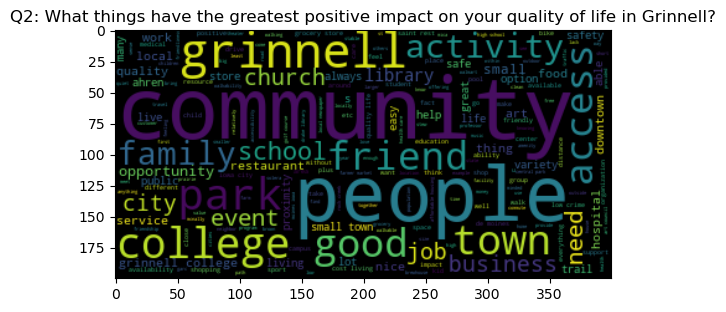

In [9]:
alltextq2 = responses['What things have the greatest positive impact on your quality of life in Grinnell? '].dropna()
listtextq2 = alltextq2.tolist()

#to prevent College and college being different
strtextq2 = " ".join(listtextq2).lower()
# listtextoneword = finaltextq1.split(' ')
listtextonewordq2 = re.split(r',| ', strtextq2)
#to get rid of stop words
listtext_withoutstopwordsq2 = [i for i in listtextonewordq2 if i not in sw_nltk]
lemmatized_textq2 = [lemmatizer.lemmatize(word) for word in listtext_withoutstopwordsq2]
finaltextq2 = " ".join(lemmatized_textq2)

#visualize
wordcloud = WordCloud().generate(finaltextq2)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.imshow(wordcloud, interpolation='bilinear')
# print(listtext_withoutstopwordsq2)
# print(finaltextq2)


In [10]:
wcq2 = word_count(finaltextq2)
wcsortedq2 = sorted(wcq2.items(), key=lambda x:x[1], reverse=True)
dict_wcsortedq2 = dict(wcsortedq2)
print(dict_wcsortedq2)

{'community': 74, 'people': 60, 'grinnell': 57, 'college': 48, 'park': 39, 'town': 36, 'good': 35, 'activity': 32, 'access': 30, 'small': 30, 'school': 28, 'friend': 26, 'city': 24, 'family': 23, 'business': 22, 'job': 21, 'opportunity': 21, 'church': 21, 'quality': 20, 'library': 20, 'local': 18, 'event': 18, 'living': 18, 'art': 18, 'need': 17, 'nice': 15, 'store': 14, 'like': 14, 'public': 13, 'restaurant': 12, 'able': 12, 'work': 12, 'great': 12, 'high': 12, 'thing': 12, 'easy': 12, 'grocery': 12, '-': 12, 'community.': 11, 'variety': 11, 'low': 11, 'grinnell.': 11, 'service': 11, 'lot': 11, 'food': 11, 'always': 10, 'many': 10, 'proximity': 10, '&': 10, 'life': 10, 'live': 10, 'help': 10, 'get': 10, 'downtown': 10, 'iowa': 10, 'medical': 9, 'rest': 9, 'hospital': 9, 'cost': 9, 'safety': 9, 'also': 9, 'place': 8, 'town.': 8, 'availability': 8, 'shop': 8, 'resource': 8, 'student': 8, 'safe': 8, 'de': 8, 'everything': 8, 'care': 8, 'health': 8, 'impact': 8, 'ahrens': 7, 'crime': 7, '

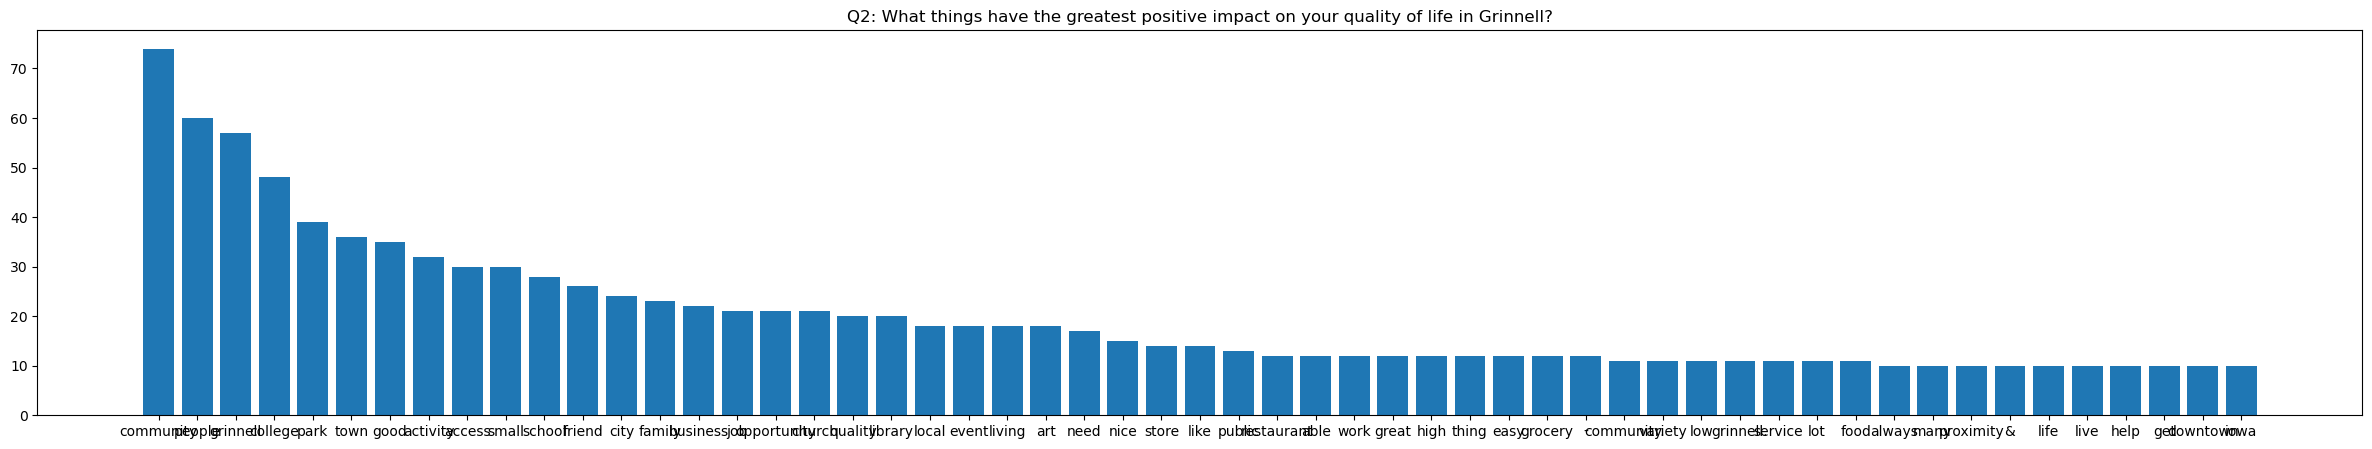

In [11]:
resultq2 = {key:value for (key, value) in dict_wcsortedq2.items() if value >= 10}

wordsq2 = list(resultq2.keys())
countsq2 = list(resultq2.values())
#resizing
fig = plt.figure(figsize=(30, 5))
plt.bar(range(len(resultq2)), countsq2, tick_label=wordsq2)
plt.title("Q2: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

QUESTION 8

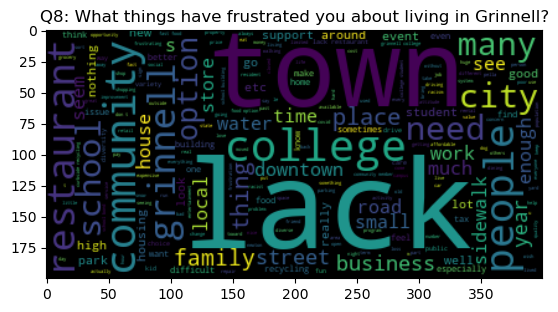

In [12]:
alltextq8 = responses['What things have frustrated you about living in Grinnell?'].dropna()
listtextq8 = alltextq8.tolist()

#to prevent College and college being different
strtextq8 = " ".join(listtextq8).lower()
# listtextoneword = finaltextq1.split(' ')
listtextonewordq8 = re.split(r',| ', strtextq8)
#to get rid of stop words
listtext_withoutstopwordsq8 = [i for i in listtextonewordq8 if i not in sw_nltk]
lemmatized_textq8 = [lemmatizer.lemmatize(word) for word in listtext_withoutstopwordsq8]
finaltextq8 = " ".join(lemmatized_textq8)

#visualize
wordcloud = WordCloud().generate(finaltextq8)
plt.title("Q8: What things have frustrated you about living in Grinnell?")
plt.imshow(wordcloud, interpolation='bilinear')
# print(listtext_withoutstopwordsq2)
# print(finaltextq2)


In [13]:
wcq8 = word_count(finaltextq8)
wcsortedq8 = sorted(wcq8.items(), key=lambda x:x[1], reverse=True)
dict_wcsortedq8 = dict(wcsortedq8)
print(dict_wcsortedq8)

{'lack': 149, 'college': 99, 'community': 98, 'people': 81, 'restaurant': 79, 'town': 77, 'school': 75, 'grinnell': 67, 'need': 55, 'many': 55, 'city': 45, 'like': 45, 'place': 40, '-': 39, 'would': 38, 'option': 38, 'get': 36, 'family': 34, 'thing': 34, 'food': 33, 'also': 33, 'business': 33, 'road': 27, 'local': 27, 'street': 26, 'water': 26, 'see': 25, 'support': 25, 'building': 24, 'sidewalk': 23, 'student': 23, 'small': 23, 'recycling': 22, 'tax': 21, 'work': 21, 'downtown': 21, 'year': 21, 'enough': 21, 'feel': 21, 'really': 20, 'around': 20, 'nothing': 20, 'go': 20, 'even': 19, 'much': 19, 'time': 19, 'look': 19, 'high': 19, 'issue': 19, 'town.': 19, 'store': 18, 'make': 18, 'find': 18, 'lot': 18, 'new': 18, 'could': 17, 'park': 17, 'sometimes': 17, 'think': 17, 'good': 17, 'public': 17, 'grinnell.': 17, 'care': 17, 'housing': 16, 'event': 16, 'house': 16, 'member': 16, 'property': 15, 'price': 15, 'seems': 15, 'home': 15, 'bond': 15, '&': 15, 'well': 15, 'know': 15, 'difficult'

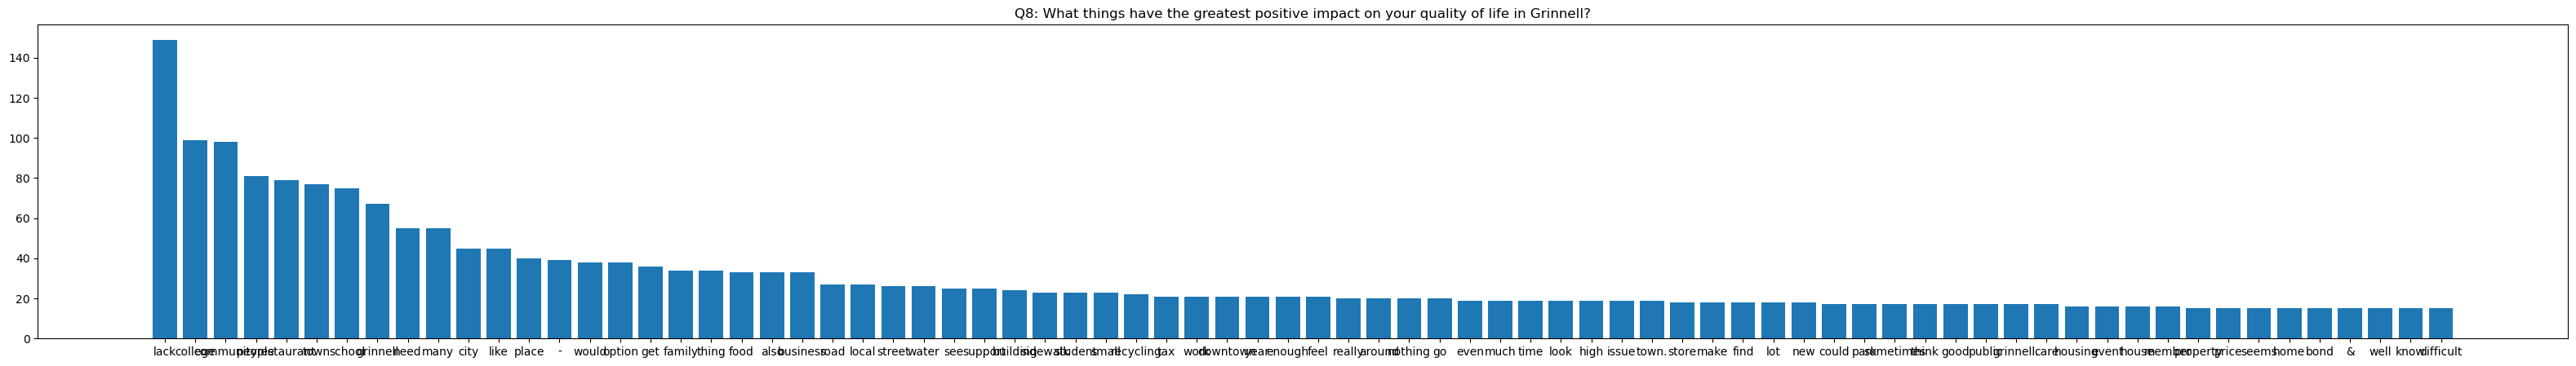

In [14]:
resultq8 = {key:value for (key, value) in dict_wcsortedq8.items() if value >= 15}


wordsq8 = list(resultq8.keys())
countsq8 = list(resultq8.values())
#resizing
fig = plt.figure(figsize=(40, 5))
plt.bar(range(len(resultq8)), countsq8, tick_label=wordsq8)
plt.title("Q8: What things have the greatest positive impact on your quality of life in Grinnell?")
plt.show()

NEW ADDITION: Taking care of only counting a word appearing once per response. PRINTS OUT DICTIONARY WITH NUMBER OF OCCURENCES OF EACH WORD. CAN DO VISUALIZATIONS ON THIS UPDATED COUNTS IF NEEDED, AND CAN REPLICATE FOR EACH QUESTION IF NEEDED


In [15]:
# Download the stopwords from nltk
nltk.download('stopwords')

# Define the column of string-type records
# records = ['this sample is a sample record', 'another record with a word in it', 'yet another record with the same word']
records = responses['What are things that make you glad to live in Grinnell?  '].dropna()
# Define the stop words to be removed
stop_words = set(nltk.corpus.stopwords.words('english'))

# Initialize an empty Counter object
word_counts = Counter()

# Loop over each record in the column
for record in records:
    # Split the record into individual words and remove punctuation
    words = record.lower().translate(str.maketrans('', '', string.punctuation)).split()
    
    # Remove stop words from the list of words
    words = [word for word in words if word not in stop_words]
    
    #lemmatizing
    words = [lemmatizer.lemmatize(word) for word in words]

    # Count the number of occurrences of each word in the record
    record_word_counts = Counter(set(words))
    
    # Add the record's word counts to the overall word count
    word_counts += record_word_counts

# Print the final word count dictionary
print(word_counts)

Counter({'community': 134, 'town': 97, 'small': 84, 'people': 78, 'college': 77, 'grinnell': 67, 'park': 51, 'good': 44, 'size': 42, 'downtown': 39, 'family': 38, 'great': 35, 'friendly': 32, 'school': 32, 'safe': 32, 'like': 30, 'nice': 30, 'lot': 29, 'live': 28, 'restaurant': 27, 'get': 27, 'low': 25, 'easy': 24, 'library': 24, 'feel': 24, 'living': 24, 'event': 23, 'city': 22, 'place': 22, 'art': 22, 'opportunity': 22, 'friend': 21, 'business': 21, 'crime': 21, 'local': 20, 'close': 19, 'diversity': 19, 'around': 19, 'love': 18, 'work': 18, 'store': 18, 'many': 17, 'activity': 17, 'access': 16, 'market': 15, 'music': 15, 'walkable': 15, 'traffic': 15, 'beautiful': 14, 'rate': 14, 'farmer': 13, 'area': 13, 'need': 13, 'option': 13, 'shop': 12, 'safety': 12, 'public': 12, 'know': 12, 'thing': 12, 'etc': 11, 'make': 11, 'dont': 11, 'center': 11, 'well': 11, 'hospital': 11, 'clean': 11, 'also': 10, 'iowa': 10, 'walk': 10, 'care': 10, 'year': 10, 'sense': 10, 'neighbor': 10, 'go': 10, 'c

[nltk_data] Downloading package stopwords to /Users/shrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


taking care of mispellings. CODE WORKS, BUT HAVING TROUBLES WITH INSTALLING SPACY AND RUNNING THAT PACKAGE


In [4]:
import spacy
import string
from collections import Counter

# Load the language model and enable the spellchecker
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner"])
nlp.add_pipe("textcat", last=True, config={"threshold": 0.9})
nlp.select_pipes(enable=["textcat", "senter"])

# Define the column of string-type records
records = responses['What are things that make you glad to live in Grinnell?  '].dropna()

# Define the stop words to be removed
# stop_words = set(nlp.Defaults.stop_words)

# Initialize an empty Counter object
word_counts = Counter()

# Loop over each record in the column
for record in records:
    # Split the record into individual words and remove punctuation
    words = record.lower().translate(str.maketrans('', '', string.punctuation)).split()
    
    # Remove stop words from the list of words
    words = [word for word in words if word not in stop_words]
    
    # Check the spelling of each word and suggest the correct spelling
    corrected_words = [token.text if not token._.is_spell_error else token._.suggestions[0] for token in nlp(" ".join(words))]
    
    # Count the number of occurrences of each word in the record
    record_word_counts = Counter(set(words))
    
    # Add the record's word counts to the overall word count
    word_counts += record_word_counts

# Print the final word count dictionary
print(word_counts)


: 

: 